In [ ]:
#importing required libraries
import warnings
warnings.filterwarnings('ignore')
 
import numpy as np
import pandas as pd
 
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
 
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from keras.datasets import mnist
from keras.optimizers import Adam

In [ ]:
#loading data 
(X_train,y_train), (X_test,y_test) = mnist.load_data()

X_train

11493376/11490434 [==============================] - 1s 0us/step


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
#checking shape
X_train.shape

(60000, 28, 28)

In [ ]:
#First image

X_train[0].shape # sp images are of 28 x 28 pixel greyscale 

(28, 28)

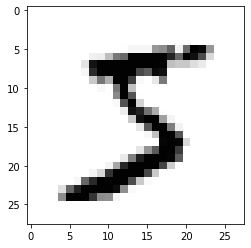

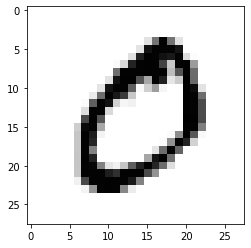

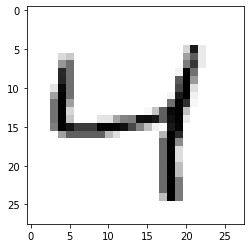

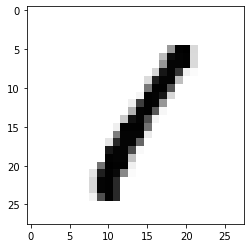

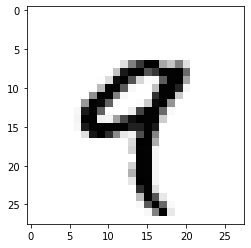

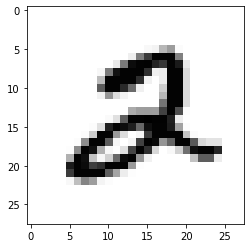

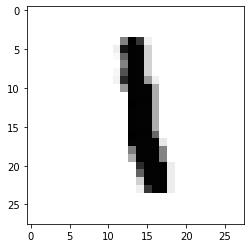

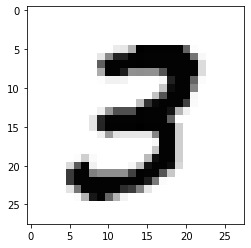

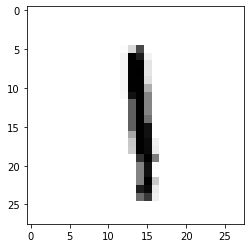

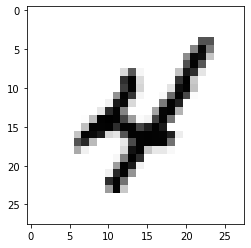

In [ ]:
#Printing first 10 images

for image in range(10):
  plt.imshow(X_train[image],cmap = 'Greys')
  plt.show()

In [ ]:
#Shape

print('X_train shape : {} and y_train shape : {}'.format(X_train.shape,y_train.shape))

print('X_test shape : {} and y_test shape : {}'.format(X_test.shape,y_test.shape))

X_train shape : (60000, 28, 28) and y_train shape : (60000,)
X_test shape : (10000, 28, 28) and y_test shape : (10000,)


Our CNN models required the input shape to be in the form of (H,W,c) format

so Let's take an image of 28 x 28 pixels

we have to reshape this into  ----> 28 x 28 x 1 ( grey scale image)
                              ----> 28 x 28 x 3 ( for color image)

In [ ]:
img_h, img_w = 28,28

input_shape = (img_h, img_w, 1) # for grey scale

# Reshapping the train and test data

X_train = X_train.reshape(X_train.shape[0],img_h,img_w, 1)
X_test  = X_test.reshape(X_test.shape[0],img_h,img_w,1)

X_train.shape

(60000, 28, 28, 1)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train[0]

5

WE have to convert this y from 1D array from (60000,) to (60000,10) where each class is present as one hot encoded vector

In [ ]:
#creating one-hot-encoding
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Why do we normalize and give input as float type insted of integer ?

For all weights and neuron activations, if you are using a method based on backpropagation for training updates, then you need a data type that approximates real numbers, so that you can apply fractional updates based on differentiation. Best weight values are often going to be fractional, non-whole numbers. Non-linearities such as sigmoid are also going to output floats. So after the input layer you have matrices of float values anyway. There is not much speed advantage multiplying integer matrix with float one (possibly even slightly slower, depending on type casting mechanism). So the input may as well be float.

In addition, for efficient training, the neural network inputs should be normalised to a specific roughly unit range (-1.0 to 1.0) or to mean 0, standard deviation 1.0. Both of these require float representation. If you have input data in 0-255 range - float or not - you will usually find the network will learn less effectively.

In [ ]:
#Change to integer to floats 

X_train  = X_train.astype('float32')
X_test = X_test.astype('float32')


# Normalize
X_train /= 255
X_test /= 255

In [ ]:
# Creating validation data 

X_train,X_vali,y_train , y_vali = train_test_split(X_train,y_train, train_size = 0.8, random_state =100)

X_vali.shape

(12000, 28, 28, 1)

In [ ]:
X_train.shape

(48000, 28, 28, 1)

BUILDING MODEL

In [ ]:
# help(Conv2D)

In [ ]:
#We are building a simple CNN network

model = Sequential()

#adding first Conv2D layer + MaxPooling 
model.add(Conv2D(64, kernel_size=(3,3),padding='same', strides= 1, activation = 'relu', input_shape= input_shape))
model.add(MaxPool2D(pool_size = (2,2)))

#adding second Conv2D layer + MaxPooling 
model.add(Conv2D(128, kernel_size=(3,3),padding='same', strides= 1, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25)) # adding dropout

model.add(Flatten()) # Flattening the output so that it can be fed into the classifier

model.add(Dense(128, activation ='relu'))
model.add(Dropout(0.25))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               8

In [ ]:
batch_size = 200
epochs = 20

model.fit(X_train,y_train, batch_size = batch_size, epochs = epochs, verbose = 1,
          validation_data = (X_vali,y_vali))


Epoch 1/20
240/240 [==============================] - 2s 8ms/step - loss: 0.2563 - accuracy: 0.9213 - val_loss: 0.0758 - val_accuracy: 0.9773
Epoch 2/20
240/240 [==============================] - 2s 7ms/step - loss: 0.0722 - accuracy: 0.9777 - val_loss: 0.0497 - val_accuracy: 0.9847
Epoch 3/20
240/240 [==============================] - 2s 7ms/step - loss: 0.0500 - accuracy: 0.9846 - val_loss: 0.0402 - val_accuracy: 0.9882
Epoch 4/20
240/240 [==============================] - 2s 7ms/step - loss: 0.0394 - accuracy: 0.9878 - val_loss: 0.0376 - val_accuracy: 0.9883
Epoch 5/20
240/240 [==============================] - 2s 7ms/step - loss: 0.0335 - accuracy: 0.9898 - val_loss: 0.0319 - val_accuracy: 0.9900
Epoch 6/20
240/240 [==============================] - 2s 8ms/step - loss: 0.0271 - accuracy: 0.9915 - val_loss: 0.0320 - val_accuracy: 0.9912
Epoch 7/20
240/240 [==============================] - 2s 7ms/step - loss: 0.0251 - accuracy: 0.9918 - val_loss: 0.0311 - val_accuracy: 0.9907
Epoch 

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0282 - accuracy: 0.9928


[0.028192710131406784, 0.9927999973297119]

In [ ]:
prediction = model.predict(X_test[0:10])
prediction

array([[5.45488405e-13, 4.05273426e-10, 8.41843695e-12, 3.96824962e-10,
        2.62690423e-13, 2.44306473e-15, 1.28762863e-18, 1.00000000e+00,
        1.30588018e-13, 8.88687346e-09],
       [5.31018618e-10, 3.22920524e-10, 1.00000000e+00, 2.76904017e-16,
        1.17211376e-13, 4.35576872e-21, 7.86805170e-12, 7.62092682e-17,
        3.09579734e-14, 1.00642538e-15],
       [2.84942001e-11, 1.00000000e+00, 2.17224745e-08, 2.07375228e-13,
        8.13979284e-09, 3.03355049e-11, 9.25880594e-10, 1.07278577e-08,
        2.44132679e-08, 4.06187389e-10],
       [1.00000000e+00, 3.00668882e-19, 8.64200188e-17, 1.54930390e-14,
        5.94286998e-15, 1.84584725e-14, 2.35400566e-09, 2.07279317e-15,
        3.97187606e-14, 5.33982242e-14],
       [2.29493161e-12, 3.25377095e-12, 4.14865299e-13, 2.48484156e-16,
        9.99999762e-01, 3.86251496e-14, 5.96042475e-13, 1.19204627e-13,
        8.50384138e-11, 2.11475196e-07],
       [9.48203408e-12, 1.00000000e+00, 9.97714480e-11, 1.25927245e-14,
   

In [ ]:
np.argmax(prediction,axis =1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

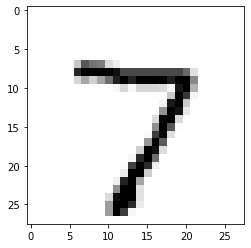

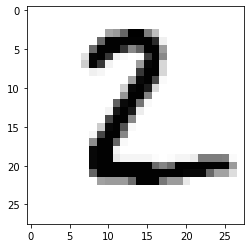

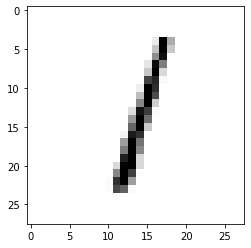

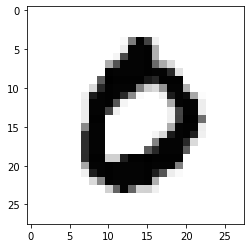

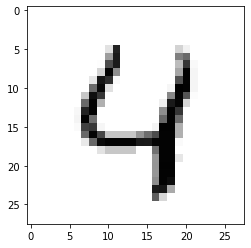

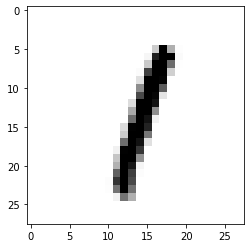

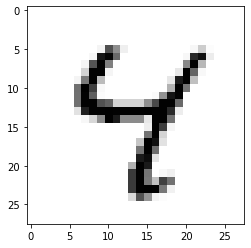

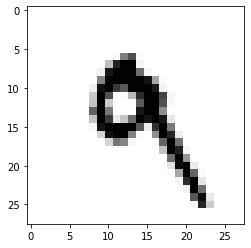

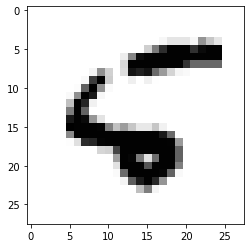

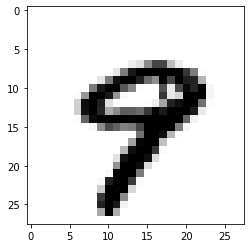

In [ ]:
#cross checking prediction with images
X_t = X_test.reshape(X_test.shape[0], img_h,img_w)

for image in range(10):
  plt.imshow(X_t[image],cmap = 'Greys')
  plt.show()